In [2]:
import pandas as pd

df = pd.read_csv("/content/sample_data/dataset1.csv")
df.head(5)

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern


In [3]:
X = df['text']
y = df['label']

In [4]:
!pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 k

In [5]:
from textattack.augmentation import WordNetAugmenter
wordnet_aug = WordNetAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: wordnet_aug.augment(x) if isinstance(x, str) else x)

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba

In [6]:
df_original = df.copy()
df['text'] = df['augmented_text']
result_df = pd.concat([df_original, df], ignore_index=True)
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
4707,1304,[ Bra Panty hardening ],0,Not Dark Pattern
4708,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
4709,1081,[Only 4 left in well-worn],1,Scarcity
4710,767,[Trending participant],0,Not Dark Pattern


In [7]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: eda_aug.augment(x) if isinstance(x, str) else x)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
df_original = result_df.copy()
df['text'] = df['augmented_text']
result_df = pd.concat([df_original, df], ignore_index=True)
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
7063,1304,[ Bra Panty hardening ],0,Not Dark Pattern
7064,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
7065,1081,[Only 4 left in well-worn],1,Scarcity
7066,767,[Trending participant],0,Not Dark Pattern


In [9]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: charswap_aug.augment(x) if isinstance(x, str) else x)

In [10]:
df_original = result_df.copy()
df['text'] = df['augmented_text']
result_df = pd.concat([df_original, df], ignore_index=True)
result_df.drop(columns=['augmented_text'], inplace=True)
result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
9419,1304,[ Bra Panty hardening ],0,Not Dark Pattern
9420,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
9421,1081,[Only 4 left in well-worn],1,Scarcity
9422,767,[Trending participant],0,Not Dark Pattern


In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [12]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [14]:
result_df['text'] = result_df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [15]:
result_df['text'] = result_df['text'].apply(preprocess)

In [16]:
result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME Shop,1,Urgency
1,158,pillowcase Shams,0,Not Dark Pattern
2,108,write review,0,Not Dark Pattern
3,1425,start return simply click follow button add re...,0,Not Dark Pattern
4,1658,newsletter signup privacy policy,0,Not Dark Pattern
...,...,...,...,...
9419,1304,Bra Panty harden,0,Not Dark Pattern
9420,1038,dressesfootwearhatshoodie sweatshirtsjerseyspa...,0,Not Dark Pattern
9421,1081,4 leave wear,1,Scarcity
9422,767,trend participant,0,Not Dark Pattern


In [17]:
X = result_df['text']
y = result_df['label']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       922
           1       0.99      0.98      0.99       963

    accuracy                           0.99      1885
   macro avg       0.99      0.99      0.99      1885
weighted avg       0.99      0.99      0.99      1885



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[912,  10],
       [ 15, 948]])

Text(95.72222222222221, 0.5, 'Truth')

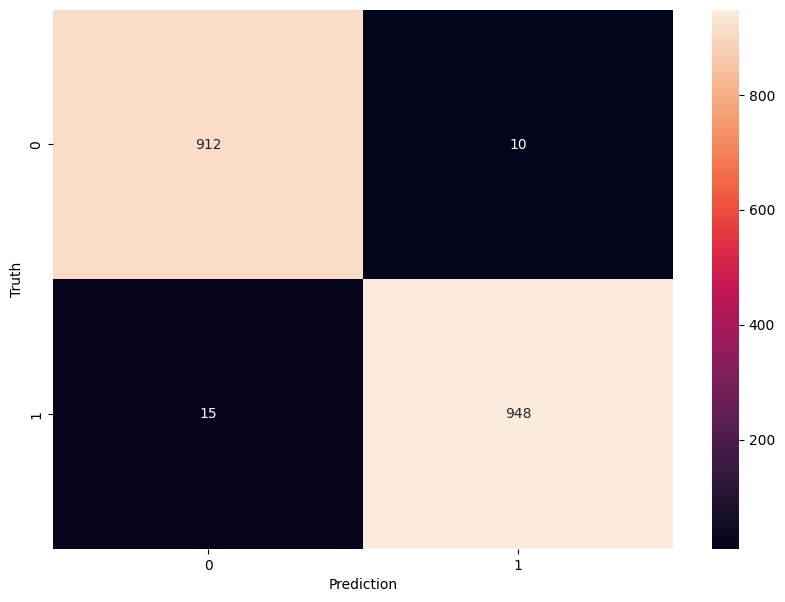

In [22]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [25]:
!pip install joblib

In [26]:
import joblib
joblib.dump(clf,'rf.pkl')

['rf.pkl']